In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
from tqdm.notebook import tqdm

from utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology,grainGenerate

from scipy import stats

In [ ]:
# json_data.append({'path': paths[i],
#                   'name': name,
#                   'type': types_dict[name],
#                   'legend': [text],
#                   'density_curve_scatter': [x,y],
#                   'gauss_approx_plot': [x_gauss, y_gauss],
#                   'gauss_approx_data': [{'mus': mus, 'sigmas':sigmas, 'amps':amps}],
#                   'angles_series': all_unique_angels,
#                   })

# All angles in one image, base plot

--------------
крупные зерна крупные зерна
 количество углов 150570
 количество снимков 500
 шаг угла 5 градусов
 mu1 = 114.71 sigma1 = 31.72 amp1 = 4.04
 mu2 = 223.51 sigma2 = 21.04 amp2 = 0.91
--------------
средние зерна средние зерна
 количество углов 276866
 количество снимков 500
 шаг угла 5 градусов
 mu1 = 110.94 sigma1 = 28.85 amp1 = 4.39
 mu2 = 220.89 sigma2 = 16.34 amp2 = 0.57
--------------
мелкие зерна мелкие зерна
 количество углов 715875
 количество снимков 500
 шаг угла 5 градусов
 mu1 = 108.77 sigma1 = 28.65 amp1 = 4.14
 mu2 = 237.47 sigma2 = 24.58 amp2 = 0.82


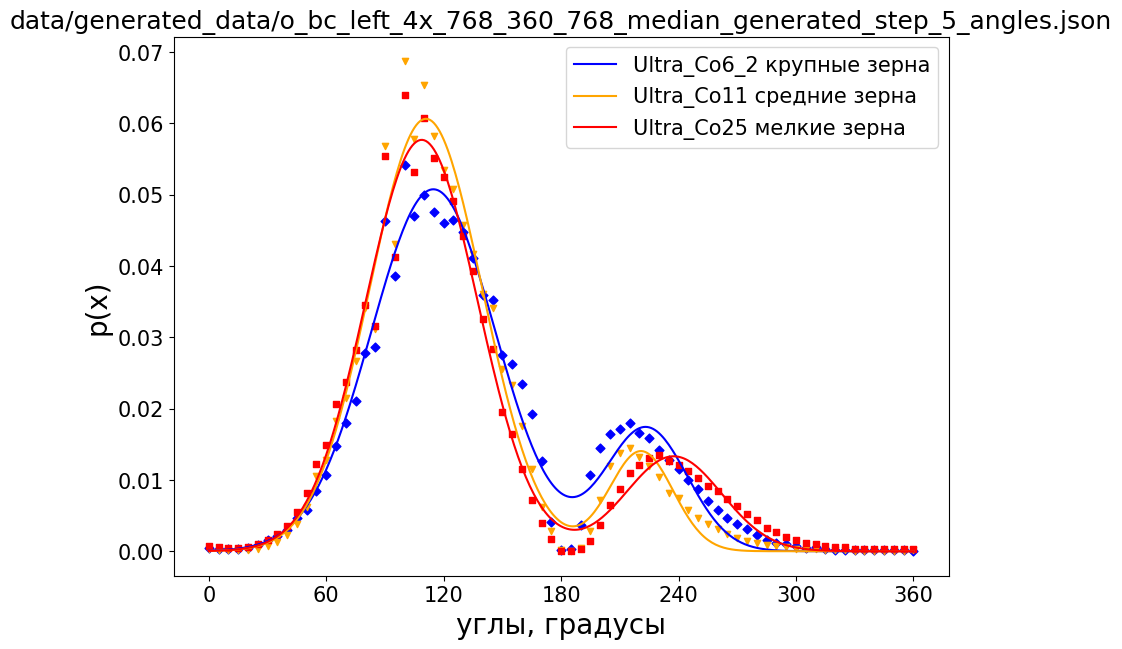

In [2]:
step=5

# file_name = 'data/generated_data/bc_left_(1536,1536,1)_preprocess_step_5_angles.json'
# data = open(file_name,encoding='utf-8')
# data = json.load(data)['data']

file_name='data/generated_data/o_bc_left_4x_768_360_768_median_generated_step_5_angles.json'
# file_name='data/generated_data/o_bc_left_4x_768_360_512_median_generated_step_5_angles.json'
# file_name='data/generated_data/o_bc_left_4x_768_360_256_median_generated_step_5_angles.json'
data = open(file_name,encoding='utf-8')
data = json.load(data)


N = 10
M = 7

# save = True
save = False

save_name=file_name

# indices=[3,0, 2]
indices=[2,0,1]

grainShow.angles_plot_base(data,save_name, step, N, M, indices=indices,save=save)

In [ ]:
def angles_approx_2(data_1, data_2, save_name, step, N, M, indices_1, indices_2, save=False, font_size=20,scatter_size=20, axes_num=3, title=None, iter_index = None):
    alloys_indices=range(len(data_1))

    plt.rcParams['font.size'] = '15'
    
    fig, axes = plt.subplots(1,axes_num,figsize=(N, M))

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
    colors_2 = ['olive', 'cyan','pink','purple', 'blue', 'lime']
    
    sub_titles = ['Large grain','Medium grain ','Small grain' ]

    legends=[]
    metrics_list = []
    for k,(i,j) in enumerate(zip(indices_1, indices_2)):
        legends.append([])
        
        y_original=np.array(data_1[i]['density_curve_scatter'][1])
        y_fake=np.array(data_2[j]['density_curve_scatter'][1])
        w_dist = stats.wasserstein_distance(y_fake, y_original)
        

        tv_dist=0
        
        gauss_real=data_1[i]['gauss_approx_data']
        gauss_fake=data_2[j]['gauss_approx_data']
        
        mus_m = (np.array(gauss_fake['mus']) - np.array(gauss_real['mus']) )/np.array(gauss_real['mus']) 
        sigmas_m = (np.array(gauss_fake['sigmas']) - np.array(gauss_real['sigmas']))/np.array(gauss_real['sigmas'])
        amps_m = (np.array(gauss_fake['amps']) - np.array(gauss_real['amps']))/np.array(gauss_real['amps'])
        
        metrics = f'{w_dist*coef:2.3f} {mus_m[0]*100:.2f} {mus_m[1]*100:.2f} {sigmas_m[0]*100:.2f} {sigmas_m[1]*100:.2f} {amps_m[0]*100:.2f} {amps_m[1]*100:.2f}' 
        # print(metrics)
        # metrics = ''
        
        metrics_list.append(metrics)
        
        # legends[k].append(data_1[i]['name']+' '+data_1[i]['type']+ f' real')
        # legends[k].append(data_2[j]['name']+' '+data_2[j]['type']+ f' fake')
        legends[k].append(data_1[i]['name']+ f" real")
        legends[k].append(data_2[j]['name']+ f" fake")

    for j,i in enumerate(indices_1):
        axes[j].plot(data_1[i]['gauss_approx_plot'][0], 
                 data_1[i]['gauss_approx_plot'][1],
                 color=colors_1[i])
    
    for j,i in enumerate(indices_2):
        axes[j].plot(data_2[i]['gauss_approx_plot'][0], 
                 data_2[i]['gauss_approx_plot'][1],
                 color=colors_2[i])

    for j,i in enumerate(indices_1):
        marker = markers[i]
        axes[j].scatter(data_1[i]['density_curve_scatter'][0],data_1[i]['density_curve_scatter'][1],  marker=marker,color=colors_1[i],s=scatter_size)
        if j==0:
            axes[j].set_ylabel('p(x)', fontsize=font_size)
        if iter_index==2:
            axes[j].set_xlabel('Angles in Co binder, deg.', fontsize=font_size-3)

    for j,i in enumerate(indices_2):
        marker = markers[i]
        axes[j].scatter(data_2[i]['density_curve_scatter'][0],data_2[i]['density_curve_scatter'][1],  marker=marker,color=colors_2[i],s=scatter_size)
        if j==0:
            axes[j].set_ylabel('p(x)', fontsize=font_size)
        if iter_index==0:
            axes[j].set_xlabel('Angles in Co binder, deg.', fontsize=font_size-3)

    x = [0,60,120,180,240,300,360]
    
    for j in range(len(axes)):
        axes[j].set_xticks(x, x)
        axes[j].legend(legends[j],loc='upper right')
        axes[j].set_ylim(0,0.07)
        if iter_index==0:
            axes[j].set_title(sub_titles[j],fontsize=font_size)

    # for i in alloys_indices:
    #     print(data_1[i]['legend'])
    # print('-----')
    # for i in alloys_indices:
    #     print(data_2[i]['legend'])
    
    if title is not None:
        if iter_index==0:
            fig.suptitle(title,fontsize=font_size, y=1.02,) 
        else:
            fig.suptitle(title,fontsize=font_size, y=0.95,) 
    else:
        fig.suptitle(save_name,fontsize=font_size) 
    
    if save:
        plt.savefig(f'распределение_углов_{save_name}_шаг_{step}.png', bbox_inches = "tight" )
    
    plt.show()
    
    return metrics_list

In [ ]:
# file_name_1='data/generated_data/o_bc_left_step_5_angles.json'
file_name_1 = 'data/generated_data/bc_left_(1536,1536,1)_preprocess_step_5_angles.json'

file_name_2_1='data/generated_data/o_bc_left_4x_768_360_768_median_generated_step_5_angles.json'
file_name_2_2='data/generated_data/o_bc_left_4x_768_360_512_median_generated_step_5_angles.json'
file_name_2_3='data/generated_data/o_bc_left_4x_768_360_256_median_generated_step_5_angles.json'

# file_name_2_1='data/generated_data/o_bc_left_4x_768_360_768_median_based_Ultra_Co25_generated_step_5_angles.json'
# file_name_2_2='data/generated_data/o_bc_left_4x_768_360_512_median_based_Ultra_Co25_generated_step_5_angles.json'
# file_name_2_3='data/generated_data/o_bc_left_4x_768_360_256_median_based_Ultra_Co25_generated_step_5_angles.json'

titles = ['768x768', '512x512','256x256']


names = [file_name_2_1, file_name_2_2, file_name_2_3]
# names = [file_name_2_1]

# N = 20*2/3

N = 20
M = 5


step=5

coef=1000
    
# save = True
save = False

data_1 = open(file_name_1,encoding='utf-8')
data_1 = json.load(data_1)['data']

metrics_all=[]

columns = f'w_dist*{coef} mu_1,% mu_2,%  sigma_1,% sigma_2,% amp_1,% amp_2,%'

for i,file_name_2 in enumerate(names):

    save_name=file_name_2.split('/')[-1]

    indices_1=[3,0, 2]
    indices_2=[2, 0, 1]

    data_2 = open(file_name_2,encoding='utf-8')
    data_2 = json.load(data_2)

    # print(columns)
    metrics = angles_approx_2(data_1,data_2,save_name, step, N, M, indices_1=indices_1,indices_2=indices_2,
                              save=save, axes_num=3, title=titles[i], iter_index=i)
    metrics_all.extend(metrics)
    

print(columns)
for m in metrics_all:
    print(m)

# Paper angles

In [ ]:
def angles_approx_paper(data_1, data_2, save_name, step, N, M, indices_1, indices_2, save=False, font_size=20,scatter_size=20, axes_num=3, title=None, iter_index = None):
    #
    # вывод распределения углов для всех фотографий одного образца
    #

    alloys_indices=range(len(data_1))

    plt.rcParams['font.size'] = '15'
    
    fig, axes = plt.subplots(1,axes_num,figsize=(N, M))
    # fig, axes = plt.subplots(1,3,figsize=(N, M))

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
    colors_2 = ['olive', 'cyan','pink','purple', 'blue', 'lime']
    
#     colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
#     colors_2 = ['olive', 'pink','pink','purple', 'blue', 'lime']
    
    sub_titles = ['Large grain','Medium grain ','Small grain' ]
    
    names_dict = {
                    'Ultra_Co6_2':'Large',
                    'Ultra_Co11':'Medium',
                    'Ultra_Co25':'Small',
                 }

    legends=[]
    metrics_list = []
    for k,(i,j) in enumerate(zip(indices_1, indices_2)):
        legends.append([])
        
        y_original=np.array(data_1[i]['density_curve_scatter'][1])
        y_fake=np.array(data_2[j]['density_curve_scatter'][1])
        w_dist = stats.wasserstein_distance(y_fake, y_original)
        
        tv_dist=0
        
        gauss_real=data_1[i]['gauss_approx_data']
        gauss_fake=data_2[j]['gauss_approx_data']
        
        mus_m = (np.array(gauss_fake['mus']) - np.array(gauss_real['mus']) )/np.array(gauss_real['mus']) 
        sigmas_m = (np.array(gauss_fake['sigmas']) - np.array(gauss_real['sigmas']))/np.array(gauss_real['sigmas'])
        amps_m = (np.array(gauss_fake['amps']) - np.array(gauss_real['amps']))/np.array(gauss_real['amps'])
        
        # metrics = f'\ntv_dist={tv_dist:.3f}\nw_dist={w_dist:.5f}\nw_gauss_dist={w_gauss_dist:.5f}\nmus_diff={mus_diff[0]:.2f};{mus_diff[1]:.2f}\nsigmas_diff={sigmas_diff[0]:.2f};{sigmas_diff[1]:.2f}'
        metrics = f'{w_dist*coef:2.3f} {mus_m[0]*100:.2f} {mus_m[1]*100:.2f} {sigmas_m[0]*100:.2f} {sigmas_m[1]*100:.2f} {amps_m[0]*100:.2f} {amps_m[1]*100:.2f}' 
        # print(metrics)
        # metrics = ''
        
        metrics_list.append(metrics)
        
        legends[k].append(names_dict[data_1[i]['name']]+ f" real")
        legends[k].append(names_dict[data_2[j]['name']]+ f" fake")

    for j,i in enumerate(indices_1):
        axes[j].plot(data_1[i]['gauss_approx_plot'][0], 
                 data_1[i]['gauss_approx_plot'][1],
                 color=colors_1[i])
    
    for j,i in enumerate(indices_2):
        axes[j].plot(data_2[i]['gauss_approx_plot'][0], 
                 data_2[i]['gauss_approx_plot'][1],
                 color=colors_2[i])

    for j,i in enumerate(indices_1):
        marker = markers[i]
        axes[j].scatter(data_1[i]['density_curve_scatter'][0],data_1[i]['density_curve_scatter'][1],  marker=marker,color=colors_1[i],s=scatter_size)
        if j==0:
            axes[j].set_ylabel('p(x)', fontsize=font_size)
        if iter_index==2:
            axes[j].set_xlabel('Angles in Co binder, deg.', fontsize=font_size-3)

    for j,i in enumerate(indices_2):
        marker = markers[i]
        axes[j].scatter(data_2[i]['density_curve_scatter'][0],data_2[i]['density_curve_scatter'][1],  marker=marker,color=colors_2[i],s=scatter_size)
        if j==0:
            axes[j].set_ylabel('p(x)', fontsize=font_size)
        if iter_index==0:
            axes[j].set_xlabel('Angles in Co binder, deg.', fontsize=font_size-3)

    x = [0,60,120,180,240,300,360]
    
    for j in range(len(axes)):
        axes[j].set_xticks(x, x)
        axes[j].legend(legends[j],loc='upper right')
        axes[j].set_ylim(0,0.07)

    if save:
        plt.savefig(f'распределение_углов_{save_name}_шаг_{step}.png', bbox_inches = "tight" )
    
    plt.show()
    
    return metrics_list

In [ ]:
# file_name_1='data/generated_data/o_bc_left_step_5_angles.json'
file_name_1 = 'data/generated_data/bc_left_(1536,1536,1)_preprocess_step_5_angles.json'

file_name_2_1='data/generated_data/o_bc_left_4x_768_360_768_median_generated_step_5_angles.json'
file_name_2_2='data/generated_data/o_bc_left_4x_768_360_512_median_generated_step_5_angles.json'
file_name_2_3='data/generated_data/o_bc_left_4x_768_360_256_median_generated_step_5_angles.json'

# file_name_2_1='data/generated_data/o_bc_left_4x_768_360_768_median_based_Ultra_Co25_generated_step_5_angles.json'
# file_name_2_2='data/generated_data/o_bc_left_4x_768_360_512_median_based_Ultra_Co25_generated_step_5_angles.json'
# file_name_2_3='data/generated_data/o_bc_left_4x_768_360_256_median_based_Ultra_Co25_generated_step_5_angles.json'

titles = ['768x768', '512x512','256x256']


names = [file_name_2_1, file_name_2_2, file_name_2_3]
# names = [file_name_2_1]

# N = 20*2/3

# N = 16
# M = 5
# N = 16*2/3


# 3 files
N = 16
M = 4

step=5

coef=1000
    
save = True
# save = False

data_1 = open(file_name_1,encoding='utf-8')
data_1 = json.load(data_1)['data']

metrics_all=[]

columns = f'w_dist*{coef} mu_1,% mu_2,%  sigma_1,% sigma_2,% amp_1,% amp_2,%'

for i,file_name_2 in enumerate(names):

    save_name=file_name_2.split('/')[-1]

    indices_1=[3,0, 2]
    indices_2=[2, 0, 1]
    
    # indices_1=[3,0]
    # indices_2=[1, 0]

    data_2 = open(file_name_2,encoding='utf-8')
    data_2 = json.load(data_2)

    # print(columns)
    metrics = angles_approx_2(data_1,data_2,save_name, step, N, M, indices_1=indices_1,indices_2=indices_2,
                              save=save, axes_num=3, title=titles[i], iter_index=i)
    metrics_all.extend(metrics)
    

print(columns)
for m in metrics_all:
    print(m)

# Approx modes

In [ ]:
def angles_approx_modes(folder, step, start1, stop1, start2, stop2, width, height, font_size=25):
    #
    # аппроксимация каждой моды
    #
    xy_scatter_o = np.load(f'{folder}/xy_scatter_step_{step}.npy', allow_pickle=True)
    xy_gauss_o = np.load(f'{folder}/xy_gauss_step_{step}.npy', allow_pickle=True)
    texts = np.load(f'{folder}/texts_step_{step}.npy', allow_pickle=True)

    xy_scatter1 = []
    xy_scatter2 = []

    for j, sc in enumerate(xy_scatter_o):
        x = sc[0]
        y = sc[1]
        xy_scatter1.append([[], []])
        xy_scatter2.append([[], []])
        for i, xi in enumerate(x):
            if xi <= stop1 and xi >= start1:
                xy_scatter1[j][0].append(x[i])
                xy_scatter1[j][1].append(y[i])

            if xi <= stop2 and xi >= start2:
                xy_scatter2[j][0].append(x[i])
                xy_scatter2[j][1].append(y[i])

    plt.rcParams['font.size'] = '25'
    markers = ['v', 's', 'D', 'd', 'p', '*']
    k = 2
    for i in range(len(xy_scatter_o)):
        plt.figure(figsize=(width, height))
        marker = markers[i]

        #    plt.scatter(xy_scatter_o[i][0],xy_scatter_o[i][1])

        x1 = np.array(xy_scatter1[i][0])
        y1 = xy_scatter1[i][1]

        x2 = np.array(xy_scatter2[i][0])
        y2 = xy_scatter2[i][1]

        mu1, sigma1, amp1 = grainApprox.gaussian_fit(x1, y1, mu=120)
        mu2, sigma2, amp2 = grainApprox.gaussian_fit(x2, y2, mu=225)

        x_gauss1 = np.arange(mu1 - 3 * sigma1, mu1 + 3 * sigma1)
        x_gauss2 = np.arange(mu2 - 3 * sigma2, mu2 + 3 * sigma2)

        y_gauss1 = grainStats.gaussian(x_gauss1, mu1, sigma1, amp1)
        y_gauss2 = grainStats.gaussian(x_gauss2, mu2, sigma2, amp2)

        #    plt.plot(x_gauss,y_gauss)
        plt.scatter(x1, y1, marker=marker)
        plt.plot(x_gauss1, y_gauss1)

        plt.scatter(x2, y2, marker=markers[i + 1])
        plt.plot(x_gauss2, y_gauss2)

        #  print('mu1=',mu1,' sigma1=',sigma1,'amp1=',amp1)
        #  print('mu2=',mu2,' sigma2=',sigma2,'amp2=',amp2)
        plt.legend(['moda1', 'moda2', 'approx1', texts[i]], fontsize=14, loc=1)
        plt.ylabel('p(x)', fontsize=font_size)
        plt.xlabel('угол связующего вещества, градусы', fontsize=font_size)
        # plt.ylim([0,max(np.log(xy_scatter[i][1][:-1]))])
    # plt.savefig('крупные моды отдельная аппрокс  ' + names[i])

    #  print(texts)

    #  plt.savefig('распределение углов')
    plt.show()

In [ ]:
folder = 'saved np'
width = 12
height = 15

step = 1

start = 340
stop = 360

start1 = 50
stop1 = 180

start2 = 180
stop2 = 300

angles_approx_modes(folder, step, start1, stop1, start2, stop2, width, height)